In [1]:
# Importaciones de bibliotecas necesarias
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
import numpy as np

data = pd.read_csv('final.csv')
df = pd.read_excel('data.xlsx')
data.head()

,w,sigma,u,e,material
0,9.424778e+08,0.0,0.000001,8.841941e-12,Perfecto
1,6.283185e+06,0.0,0.000001,7.161972e-10,Perfecto
2,6.283185e+07,0.0,0.000005,7.957747e-11,Perfecto
3,2.000000e+08,0.0,0.000001,7.161972e-10,Perfecto
4,6.000000e+08,0.0,0.000001,3.536777e-11,Perfecto


In [2]:
# Calculando el valor de 'tan'
data['tan'] = data['sigma']/(data['w']*data['e'])

# Definiendo una función para clasificar el material basado en el valor de 'tan'
def material(data):
  if data['tan'] == 0:
    return 'Perfecto'
  elif data['tan'] <= 25:
    return 'Perdidas'
  elif data['tan'] > 25:
    return 'Conductor'

# Aplicando la función a cada fila y almacenando el resultado en una nueva columna 'material'
data['material'] = data.apply(material, axis=1)
data.drop('tan', axis=1, inplace=True)
data.head()

,w,sigma,u,e,material
0,9.424778e+08,0.0,0.000001,8.841941e-12,Perfecto
1,6.283185e+06,0.0,0.000001,7.161972e-10,Perfecto
2,6.283185e+07,0.0,0.000005,7.957747e-11,Perfecto
3,2.000000e+08,0.0,0.000001,7.161972e-10,Perfecto
4,6.000000e+08,0.0,0.000001,3.536777e-11,Perfecto


In [3]:
# Filtrando los datos para diferentes categorías de materiales
data_buen_conductor = data[data['material'] == 'Conductor']
data_dielectrico_con_perdidas = data[data['material'] == 'Perdidas']

In [4]:
# Preparando los datos para el entrenamiento de los modelos
X_buen_conductor = data_buen_conductor[['w', 'sigma', 'e']].values
y_buen_conductor = data_buen_conductor['u'].values
X_train_buen_conductor, X_test_buen_conductor, y_train_buen_conductor, y_test_buen_conductor = train_test_split(X_buen_conductor, y_buen_conductor, test_size=0.2, random_state=42)

In [5]:
X_dielectrico_con_perdidas = data_dielectrico_con_perdidas[['w', 'sigma', 'e']].values
y_dielectrico_con_perdidas = data_dielectrico_con_perdidas['u'].values
X_train_dielectrico_con_perdidas, X_test_dielectrico_con_perdidas, y_train_dielectrico_con_perdidas, y_test_dielectrico_con_perdidas = train_test_split(X_dielectrico_con_perdidas, y_dielectrico_con_perdidas, test_size=0.2, random_state=42)

In [6]:
X_test_buen_conductor = pd.DataFrame(X_test_buen_conductor)
X_test_buen_conductor.columns = ['w', 'sigma', 'e']
# El parámetro 'how' se establece en 'inner' para realizar una intersección.
coincidencias = pd.merge(X_test_buen_conductor, df, how='inner')
coincidencias

,w,sigma,e,u
0,6.283185e+08,61000000.0,8.841941e-12,0.000001
1,6.521946e+03,61000000.0,8.841941e-12,0.000001


In [7]:
X_test_dielectrico_con_perdidas = pd.DataFrame(X_test_dielectrico_con_perdidas)
X_test_dielectrico_con_perdidas.columns = ['w', 'sigma', 'e']
coincidencias = pd.merge(X_test_dielectrico_con_perdidas, df, how='inner')
coincidencias

,w,sigma,e,u
0,6.283185e+09,0.000139,2.210485e-11,0.000001
1,1.500000e+09,0.000011,1.768388e-11,0.000001


In [8]:
# Definiendo el número de splits para KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Escalando las características para el modelo de buen conductor
scaler_buen_conductor = StandardScaler().fit(X_buen_conductor)
X_buen_conductor_scaled = scaler_buen_conductor.transform(X_buen_conductor)

# Escalando las características para el modelo de dieléctrico con pérdidas
scaler_dielectrico_con_perdidas = StandardScaler().fit(X_dielectrico_con_perdidas)
X_dielectrico_con_perdidas_scaled = scaler_dielectrico_con_perdidas.transform(X_dielectrico_con_perdidas)

# Inicializando el modelo de regresión lineal
model = LinearRegression()

# Realizando la validación cruzada para 'Buen Conductor'
r2_scores_buen_conductor = cross_val_score(model, X_buen_conductor_scaled, y_buen_conductor, cv=kf, scoring='r2')

# Realizando la validación cruzada para 'Dielectrico con Perdidas'
r2_scores_dielectrico_con_perdidas = cross_val_score(model, X_dielectrico_con_perdidas_scaled, y_dielectrico_con_perdidas, cv=kf, scoring='r2')

# Calculando el promedio de los R2 scores
r2_avg_buen_conductor = r2_scores_buen_conductor.mean()
r2_avg_dielectrico_con_perdidas = r2_scores_dielectrico_con_perdidas.mean()

r2_avg_buen_conductor, r2_avg_dielectrico_con_perdidas

(-2.2649094510287786, 0.05632255429219)

In [9]:
# Definiendo el número de splits para KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Inicializando el modelo de regresión lineal
model = DecisionTreeRegressor(random_state=42)

# Realizando la validación cruzada para 'Buen Conductor'
r2_scores_buen_conductor = cross_val_score(model, X_buen_conductor, y_buen_conductor, cv=kf, scoring='r2')

# Realizando la validación cruzada para 'Dielectrico con Perdidas'
r2_scores_dielectrico_con_perdidas = cross_val_score(model, X_dielectrico_con_perdidas, y_dielectrico_con_perdidas, cv=kf, scoring='r2')

# Calculando el promedio de los R2 scores
r2_avg_buen_conductor = r2_scores_buen_conductor.mean()
r2_avg_dielectrico_con_perdidas = r2_scores_dielectrico_con_perdidas.mean()

r2_avg_buen_conductor, r2_avg_dielectrico_con_perdidas

(0.8780096637624102, 0.8287493458683717)

In [10]:
# Modelo de Bosques aleatorios para Buen Conductor
model_buen_conductor = DecisionTreeRegressor()
model_buen_conductor.fit(X_train_buen_conductor, y_train_buen_conductor)

# Modelo de Bosques aleatorios para Dielectrico con Perdidas
model_dielectrico_con_perdidas = DecisionTreeRegressor()
model_dielectrico_con_perdidas.fit(X_train_dielectrico_con_perdidas, y_train_dielectrico_con_perdidas)

DecisionTreeRegressor()

In [11]:
import numpy as np
from sympy import Eq, symbols, latex, I
from IPython.display import display, Math

def metodo_gauss_seidel(w, sigma, u, e, Eo, alpha_inicial=1.0, beta_inicial=1.0, max_iter=1000, tol=1e-6):
    tan = sigma / (w * e)
    alpha = alpha_inicial
    beta = beta_inicial
    
    # Verificar si es un Conductor
    if tan > 25:  # sigma / (w * e) >> 1
        alpha = beta = np.sqrt((u * w * sigma)/(2))
        eta = np.pi/4
    else:
        for i in range(max_iter):
            # Guardar valores antiguos para verificar la convergencia
            alpha_antiguo = alpha
            beta_antiguo = beta

            # Actualizar alpha usando el valor actual de beta
            alpha = w * sigma * u / (2 * beta)
            
            # Actualizar beta usando el nuevo valor de alpha
            beta = (alpha**2 + w**2 * u * e)**0.5

            # Verificar la convergencia
            if abs(alpha - alpha_antiguo) < tol and abs(beta - beta_antiguo) < tol:
                eta = 0.5*np.arctan(tan)
                break

    
    # Variables fuera de la condición
    velocidad_propagacion = w/beta
    longitud_onda = (2*np.pi*velocidad_propagacion)/w
    modulo_impedancia = (np.sqrt(u/e))/((1+tan**2)**0.25)
    impedancia_real = modulo_impedancia*np.cos(eta)
    impedancia_imaginaria = modulo_impedancia*np.sin(eta)
    ecuacion_E = "E(z, t) = {} \cdot e^{{-{} z}} \cdot \cos({}t-{} z) \mathbf{{ax}}".format(
        Eo, round(alpha, 4), round(w, 4), round(beta, 4))
    ecuacion_H = "H(z, t) = {} \cdot e^{{-{} z}} \cdot \cos({}t-{} z - {}) \mathbf{{ay}}".format(
        round(Eo/modulo_impedancia, 4), round(alpha, 4), round(w, 4), round(beta, 4), round(eta, 4))

    
    return {
        'alpha': alpha,
        'beta': beta,
        'velocidad_propagacion': velocidad_propagacion,
        'longitud_onda': longitud_onda,
        'impedancia_real': impedancia_real,
        'impedancia_imaginaria': impedancia_imaginaria,
        'ecuacion_E': ecuacion_E,
        'ecuacion_H': ecuacion_H
    }

def obtener_u(w, sigma, e, model_buen_conductor=model_buen_conductor, model_dielectrico_con_perdidas=model_dielectrico_con_perdidas):
    u_0 = 4 * np.pi * 1e-7  # Permeabilidad magnética en el vacío

    if sigma == 0:
        return u_0
    else:
        sigma_we = sigma / (w * e)
        # Escalar las características antes de hacer predicciones
        if sigma_we > 25:
            return model_buen_conductor.predict([[w, sigma, e]])[0]
        else:
            return model_dielectrico_con_perdidas.predict([[w, sigma, e]])[0]

def imprimir_resultados(resultados):
    display(Math(r'\alpha = {} \, \text{{Np/m}}'.format(resultados['alpha'])))
    display(Math(r'\beta = {} \, \text{{rad/m}}'.format(resultados['beta'])))
    display(Math(r'v_p = {} \, \text{{m/s}}'.format(resultados['velocidad_propagacion'])))
    display(Math(r'\lambda = {} \, \text{{m}}'.format(resultados['longitud_onda'])))
    display(Math(r'\eta = {} + j{} \, \Omega'.format(resultados['impedancia_real'], resultados['impedancia_imaginaria'])))
    display(Math(resultados['ecuacion_E'] + r' \, \text{V/m}'))
    display(Math(resultados['ecuacion_H'] + r' \, \text{A/m}'))

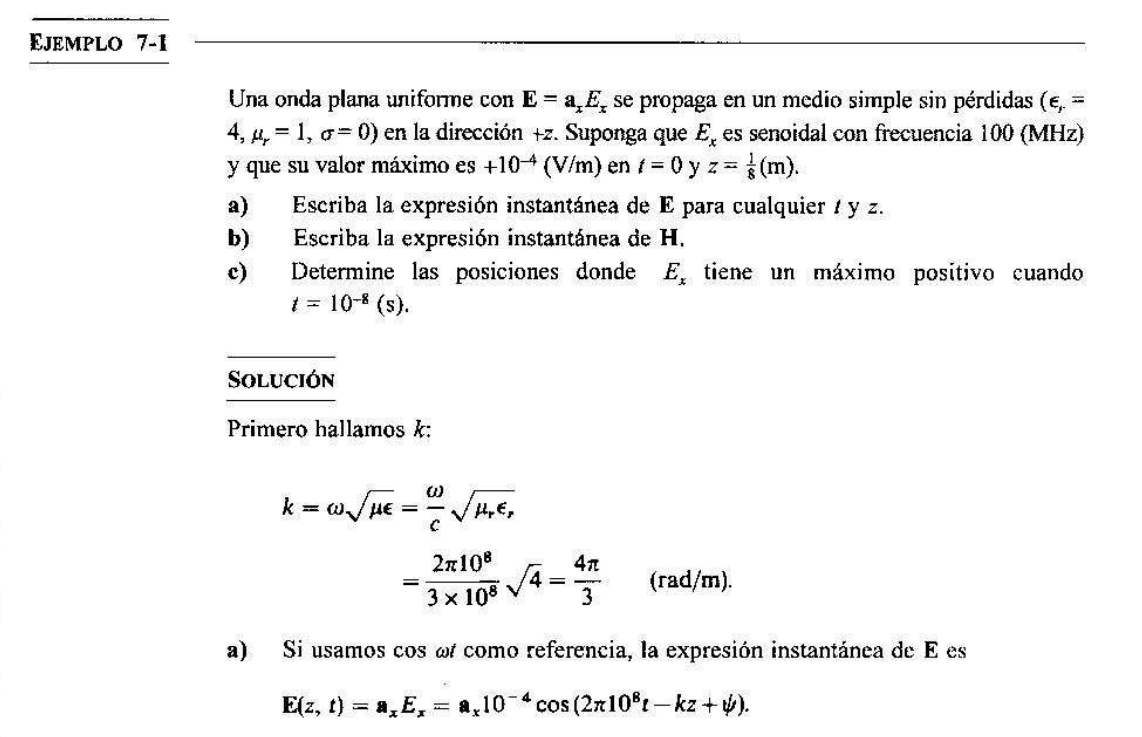
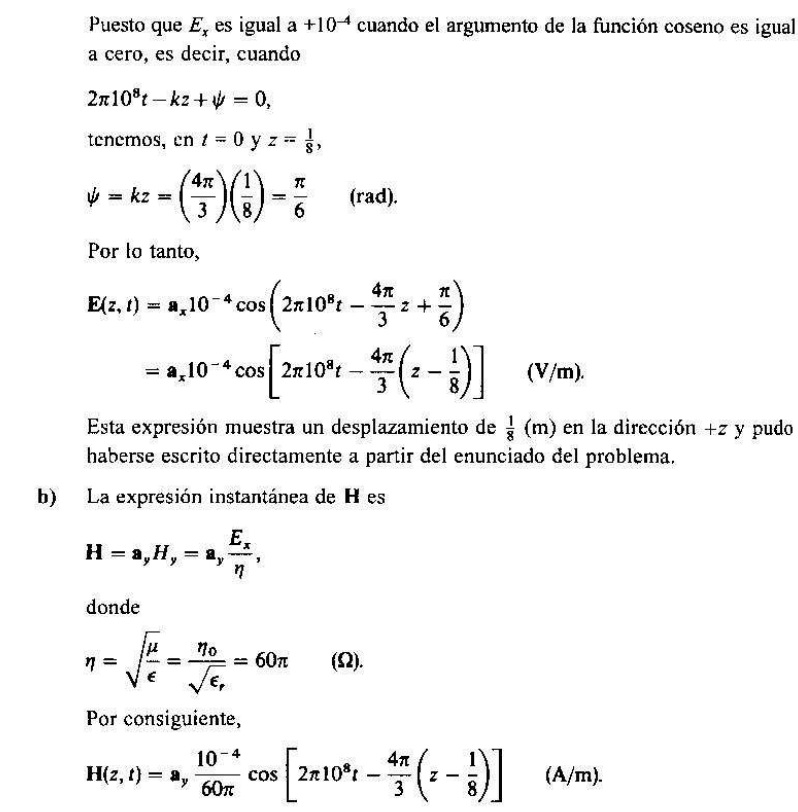

## Ejercicio tomado de Fundamentos de electromagnetismo para ingeniería por Cheng, D.
Cheng, D. (1997). Fundamentos de electromagnetismo para ingeniería (1° edición). Pearson.

In [12]:
# Prueba Dielectrico Perfecto
Eo = 1
w = np.pi*1e8*2
e = (4*1e-9)/(36*np.pi)
sigma = 0
u = obtener_u(w,sigma,e)
print(u)

print("Resultados para un Dielectrico Perfecto")
resultados_dielectrico = metodo_gauss_seidel(w, sigma, u, e, Eo)
imprimir_resultados(resultados_dielectrico)
print("\n\n")

1.2566370614359173e-06
Resultados para un Dielectrico Perfecto


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

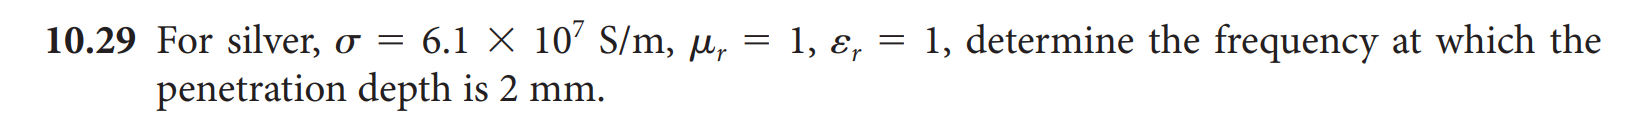
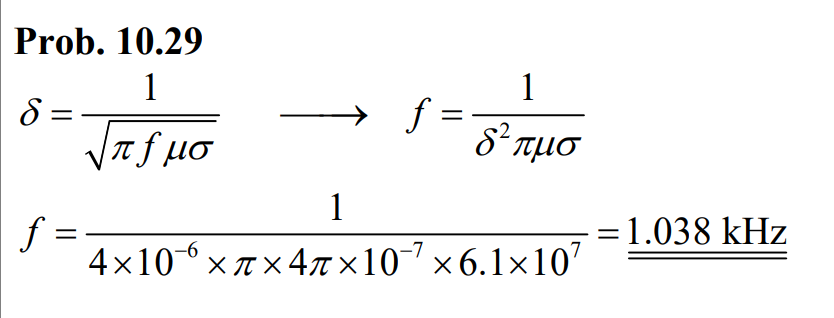

$$
\delta = 2 \times 10^{-3} \text{ m} \quad \Rightarrow \quad \alpha = \frac{1}{\delta}
$$

$$
\Rightarrow \quad \alpha = 500 \text{ m}^{-1} = \beta
$$

## Ejercicio tomado de Elementos de electromagnetismo por Sadiku, M.
Sadiku, M. (2010). Elementos de electromagnetismo (3ª Edición). Alfaomega, OXFORD.

In [13]:
# Prueba Conductor
Eo = 1
w = 1.038*1e3*2*np.pi
e = (1e-9)/(36*np.pi)
sigma = 6.1*1e7
u = obtener_u(w,sigma,e)
print(u)

print("Resultados para un Conductor")
resultados_dielectrico = metodo_gauss_seidel(w, sigma, u, e, Eo)
imprimir_resultados(resultados_dielectrico)
print("\n\n")

1.25663706e-06
Resultados para un Conductor


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

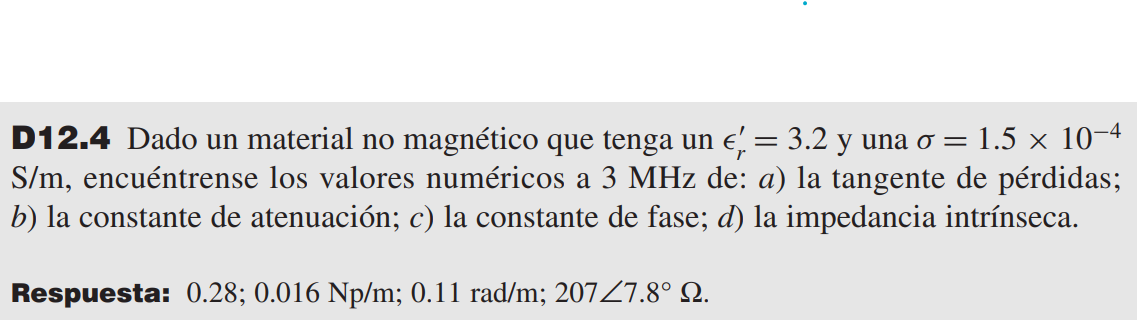
## Ejercicio tomado de Teoría electromagnética por Hayt, W., y Buck, J.
Hayt, W., Buck, J. (2012). Teoría electromagnética (8ª edición). McGraw-Hill.

In [14]:
Eo = 1
w = 3*2*np.pi*1e6
sigma = 1.5*1e-4
e = (3.2*1e-9)/(36*np.pi)
u = obtener_u(w,sigma,e)
print(u)

print("Resultados para un dielectrico con perdida")
resultados_conductor = metodo_gauss_seidel(w, sigma, u, e, Eo)
imprimir_resultados(resultados_conductor)

1.25663706e-06
Resultados para un dielectrico con perdida


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>